# logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder

In [7]:
df=pd.read_csv(r"C:\Users\HP\Downloads\train.csv")


In [8]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df.duplicated().sum()


0

In [19]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df[col]=df[col].fillna(df[col].median())

In [20]:
#to encode categorical variable we use label encoder
label=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=label.fit_transform(df[col])

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [25]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


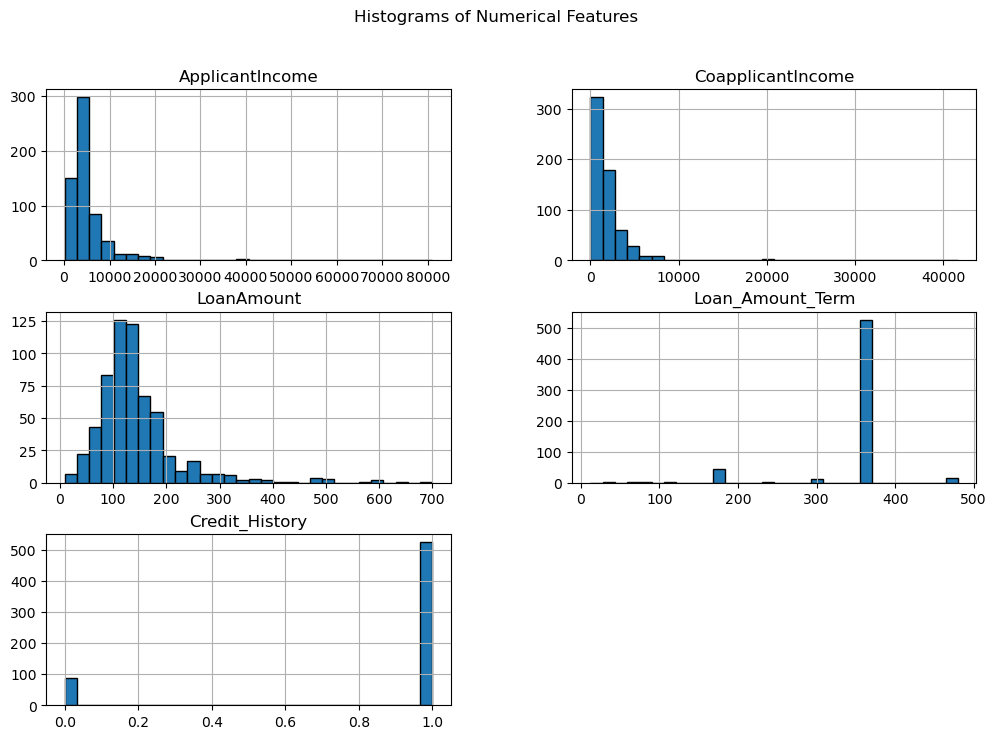

In [29]:
numerical_cols = ["ApplicantIncome", "CoapplicantIncome", 
                  "LoanAmount", "Loan_Amount_Term", "Credit_History"]

df[numerical_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()



                    Loan_ID    Gender   Married  Dependents  Education  \
Loan_ID            1.000000 -0.028029 -0.016013    0.051559   0.039442   
Gender            -0.028029  1.000000  0.364569    0.172914   0.045364   
Married           -0.016013  0.364569  1.000000    0.334216   0.012304   
Dependents         0.051559  0.172914  0.334216    1.000000   0.055752   
Education          0.039442  0.045364  0.012304    0.055752   1.000000   
Self_Employed      0.032874 -0.000525  0.004489    0.056798  -0.010383   
ApplicantIncome    0.016925  0.058809  0.051708    0.118202  -0.140760   
CoapplicantIncome  0.039211  0.082912  0.075948    0.030430  -0.062290   
LoanAmount         0.036872  0.106904  0.146546    0.163103  -0.168759   
Loan_Amount_Term  -0.033028 -0.074030 -0.100912   -0.103864  -0.073928   
Credit_History    -0.030603  0.009170  0.010938   -0.040160  -0.073658   
Property_Area     -0.155416 -0.025752  0.004257   -0.000244  -0.065243   
Loan_Status        0.011773  0.017987 

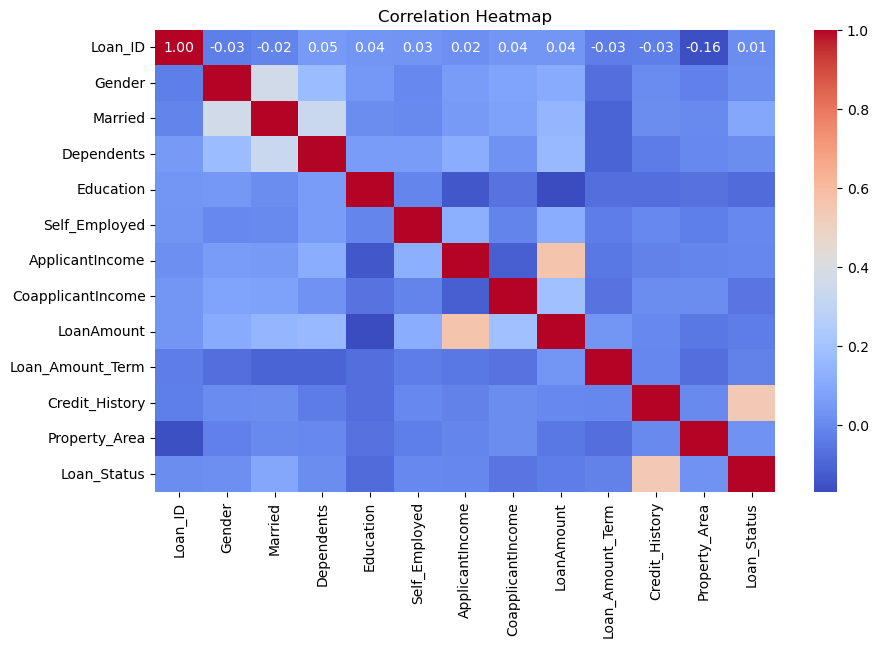

In [34]:
corr_matrix = df.corr()
print(corr_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
X = df.drop('Loan_Status',axis=1)
y=df['Loan_Status']


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model=LogisticRegression()
model.fit(X_train,y_train)


C:\Users\HP\anaconda4\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred = model.predict(X_test)


In [37]:
y_pred_proba=model.predict_proba(X_test)[:,1]

In [38]:
y_pred_proba

array([0.72328009, 0.78233366, 0.84735177, 0.58405956, 0.72271436,
       0.78624343, 0.90107146, 0.87315557, 0.87024874, 0.89080109,
       0.66268597, 0.68002383, 0.89973038, 0.82713227, 0.92537873,
       0.8506957 , 0.78837266, 0.6239216 , 0.83787316, 0.88126262,
       0.82947244, 0.84196552, 0.70549694, 0.8204976 , 0.80246908,
       0.4997257 , 0.74229565, 0.68673099, 0.81666065, 0.95165422,
       0.93790822, 0.73432123, 0.74874307, 0.71773925, 0.46084102,
       0.23685589, 0.79514607, 0.94667113, 0.90677032, 0.90462775,
       0.7496159 , 0.84915504, 0.78190825, 0.70206163, 0.76683763,
       0.88402433, 0.85422405, 0.47169711, 0.29324386, 0.25419909,
       0.68644067, 0.57335567, 0.43943959, 0.52520545, 0.80608289,
       0.85244916, 0.6800024 , 0.85876181, 0.38862198, 0.86869025,
       0.44407669, 0.83014424, 0.53255295, 0.6327817 , 0.92280577,
       0.69216296, 0.80773246, 0.82104489, 0.95466467, 0.79736106,
       0.30988163, 0.84753587, 0.77578103, 0.83202476, 0.70102

In [40]:
print("\nModel Evaluation:")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1score:",f1_score(y_test,y_pred))



Model Evaluation:
Accuracy: 0.7479674796747967
Precision: 0.7289719626168224
Recall: 0.975
F1score: 0.8342245989304813
